In [10]:
try:
    from PIL import Image
except ImportError:
    import Image
import matplotlib.pyplot as plt

import subprocess
import imutils
import shutil
import cv2
import os

In [12]:
import pytesseract

In [29]:
def preproccesing(img):
    image = imutils.resize(img, width=800)
    image = cv2.GaussianBlur(image, (5,5), 0)
    image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    result = 255 - image
    return result

In [30]:
labels = {
    0: 'label',
    1: 'price',
    2: 'cop',
    3: 'name',
    4: 'barcode'
}

labels_to_show = {
    0: 'label',
    1: 'price',
    2: 'cop',
    3: 'name',
    4: 'barcode'
}

In [31]:
images_gen = iter(os.listdir('images/'))

In [32]:
image_name = next(images_gen)

In [33]:
try:
    shutil.rmtree('runs/detect/')
except OSError as e:
    print ("Error: %s - %s." % (e.filename, e.strerror))

process = subprocess.run(['python3', 'detect.py', 
                          '--weights', 'weights/best.pt', 
                          '--img', '1024',
                          '--conf', '0.45',
                          '--source', 'images/' + image_name,
                          '--save-txt'],
                                        check=False,
                                        capture_output=True,  
                                        universal_newlines=True)

### Tesseract

price:
44
________________
name:
PAST] TANG MR MUSCULO 4 P’
________________
name:
PAST) TANG MR MUSCULO 4 PZ
________________
barcode:
ne
r | |
Na
________________
label:
| $44” o
Sac TT
________________
barcode:
NAW
________________
cop:
re
________________
cop:
le
________________
price:
aa
________________
label:
aa"
en he
TT
________________


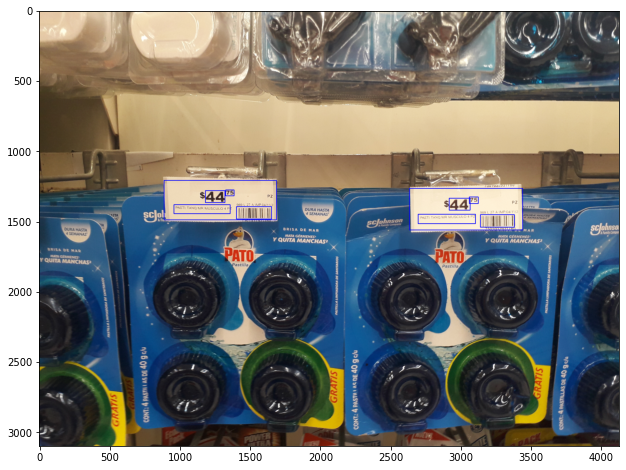

CPU times: user 1.32 s, sys: 110 ms, total: 1.43 s
Wall time: 2.35 s


In [34]:
%%time
img = cv2.imread('images/' + image_name)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

dh, dw = gray.shape
fl = open("runs/detect/exp/labels/" + os.path.splitext(image_name)[0] + '.txt', 'r')
data = fl.readlines()
fl.close()

for dt in data:

    l, x, y, w, h = map(float, dt.split(' '))

    x1 = int((x - w / 2) * dw)
    x2 = int((x + w / 2) * dw)
    y1 = int((y - h / 2) * dh)
    y2 = int((y + h / 2) * dh)
    
    field = labels.get(int(l))
    if labels_to_show.get(int(l)):
        
        crop_img = gray[y1:y2, x1:x2]
        
        text = pytesseract.image_to_string(preproccesing(crop_img), lang='eng', config="--psm 6")
        print(field + ':')
        print(text.strip())
        print('________________')


    if x1 < 0:
        x1 = 0
    if x2 > dw - 1:
        x2 = dw - 1
    if y1 < 0:
        y1 = 0
    if y2 > dh - 1:
        y2 = dh - 1

    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
    
plt.figure(figsize=(16,8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

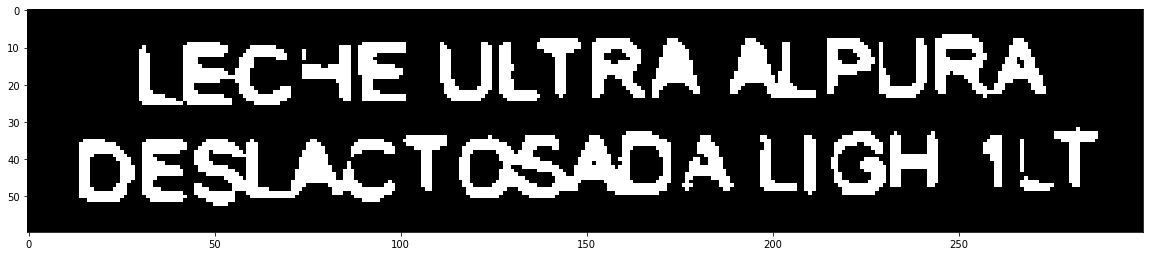

In [28]:
def preproccesing(img):
    image = imutils.resize(img, width=300)
#     image = cv2.GaussianBlur(image, (3,3), 0)
    image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    result = 255 - image
    return result

img = cv2.imread('sample/name.png', 0)
prep_img = preproccesing(img)
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(prep_img, cv2.COLOR_BGR2RGB))
plt.show()

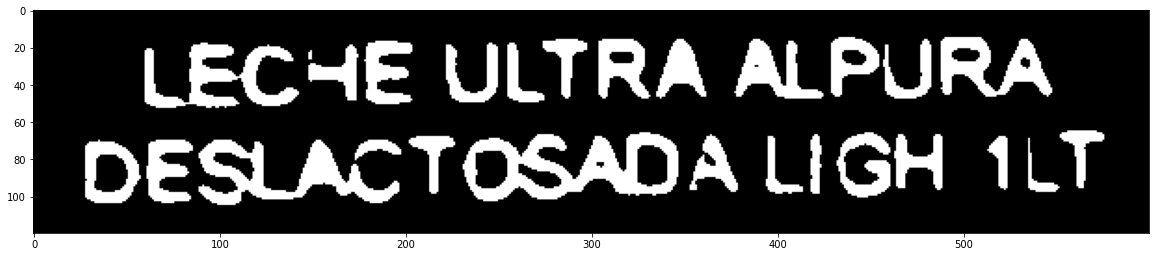

In [25]:
def preproccesing(img):
    image = imutils.resize(img, width=600)
#     image = cv2.GaussianBlur(image, (1,1), 0)
    image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    result = 255 - image
    return result

img = cv2.imread('sample/name.png', 0)
prep_img = preproccesing(img)
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(prep_img, cv2.COLOR_BGR2RGB))
plt.show()

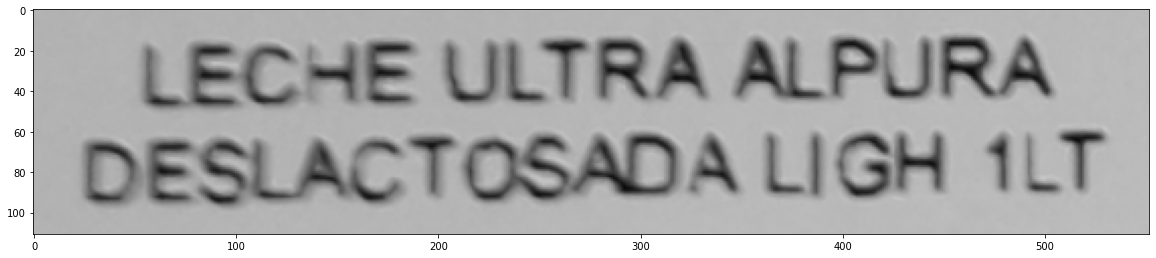

In [58]:
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()